For this analysis, we use the cells that were used for the typing, as we are sure that they have a proper spatial STA (needed for LSC measure).

In [1]:
rootF = 'D:/Data/Paper defocus/'

In [2]:
import os as os
import sys
import numpy as np
import csv
import pickle as pickle
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib.patches as pcs
from skimage.transform import rescale, resize, downscale_local_mean
import seaborn as sns
from matplotlib.patches import Ellipse

# Import functions
from shared.functions import fit_gaussian, get_ellipse_parameters, plot_scale_bar, load_image_as_on_MEA
from shared.LSC_functions import local_spatial_contrast
from shared.save_load import load_obj, save_obj

In [4]:
exp = 20211208

# Experiment conditions
from shared.parameters_stimulation2 import *
pixel_size_um = 3.5
pixel_per_check = 12
nb_checks = 60

# Load data

In [5]:
path_to_original_images = rootF + '/Eye model simulations/original images/'
imF = rootF + '/Eye model simulations/convolved images/'

##### STAs

In [6]:
cell_data = load_obj(rootF + 'MEA/exp' + str(exp) + '/cells_characterization_data_' + str(exp))

data_clusters = list(cell_data.keys())

##### Select STA

In [7]:
results_path = rootF + '/MEA/exp' + str(exp) + '/'
    
cluster_selection = pd.read_excel(results_path + str(exp) + '_cluster_selection.xlsx', header=0)

cluster_names = cluster_selection['Cluster']
defined_STA = cluster_selection['Comments Sarah']
STA_start = cluster_selection['Spatial STA']
STA_end = cluster_selection['Sp STA END']

skip_cells = [] # very low firing rate during chirp

# Select "YES" cells with a spatial STA
selected_cells = []
which_STA = []

for i in range(len(cluster_names)):
    if cluster_names[i] not in skip_cells and defined_STA[i] != 'no STA':
        if STA_start[i] == 0:
            print (cluster_names[i], 'end')
            which_STA.append('end')
            selected_cells.append(cluster_names[i])
        else:
            print (cluster_names[i], 'start')
            which_STA.append('start')
            selected_cells.append(cluster_names[i])
            
print (len(selected_cells), 'good cells!')

5 start
10 start
20 start
22 start
41 start
45 start
55 start
56 start
62 start
63 start
66 start
73 end
78 start
83 start
86 start
99 start
100 end
102 start
112 start
119 start
125 start
126 start
130 start
136 start
138 start
144 start
153 start
158 end
162 start
168 start
195 start
210 start
220 start
238 start
241 start
247 start
260 start
263 end
270 start
271 start
273 start
276 start
280 start
283 start
284 start
287 start
292 start
296 end
300 start
316 start
318 start
329 start
333 start
335 start
356 start
359 start
360 end
361 start
368 start
370 start
380 start
382 start
387 start
389 start
401 start
406 start
407 start
411 end
415 start
419 start
420 start
421 start
422 start
424 start
430 end
435 start
438 start
439 start
441 start
447 start
449 start
450 start
452 start
457 start
460 end
463 start
464 start
466 start
469 start
470 start
471 start
472 end
478 end
480 start
482 start
486 start
493 start
496 start
497 start
498 start
506 start
511 start
513 start
515 start

##### Cells with defined STA

In [8]:
exp_path = rootF + '/MEA/exp' + str(exp) + '/'

cells_clustering = load_obj(exp_path + str(exp) + '_selected_cells_clustering')
cells_clustering = np.array(cells_clustering)

print (len(cells_clustering), 'cells were typed')

113 cells were typed


# Get ellipse points

In [9]:
# STA scaling
check_size_um = pixel_size_um * pixel_per_check # the size in um of one check
total_check_size_um = check_size_um * nb_checks # the tsize in um of the entire checkerboard
check_size_pix = pixel_per_check * nb_checks
print ('Checkerboard size in pixels:', check_size_pix)

# Image size
imo = load_image_as_on_MEA(path_to_original_images+ 'image_1_image.png')
img_size = 864

# Checkerboard is translated with respect to image
check_to_img_translation = int((img_size - check_size_pix)/2)
print ('Translation in pixels:', check_to_img_translation)

# Scale bar
scale_bar_kwargs = {
        'color': 'w',
        'linewidth': 2.0,
        'solid_capstyle': 'butt',  # instead of 'projection (default)'
    }
text_offset = 10
fontsize='small'

# Original images
images = ['1','2','3','5']
original_images_number = [5, 31, 2219, 1346]

Checkerboard size in pixels: 720
Translation in pixels: 72


## Getting 2-sigma ellipse points and receptive fields weights

[]
0 / 143 5


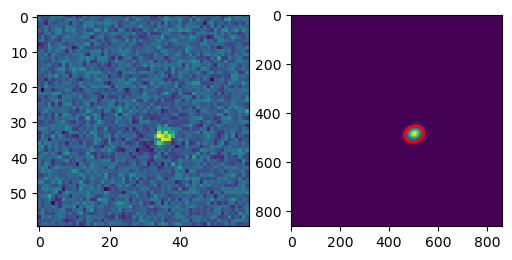

1 / 143 8


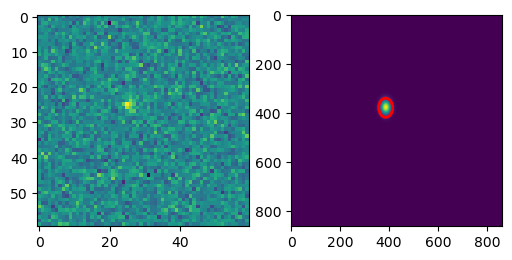

2 / 143 13


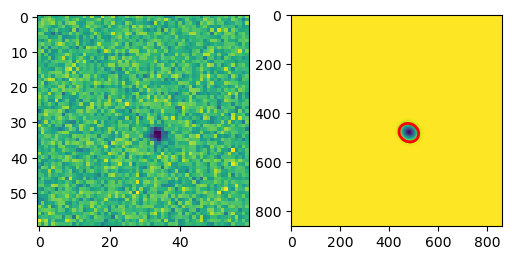

3 / 143 15


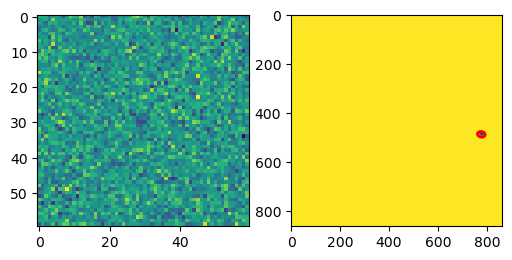

4 / 143 18


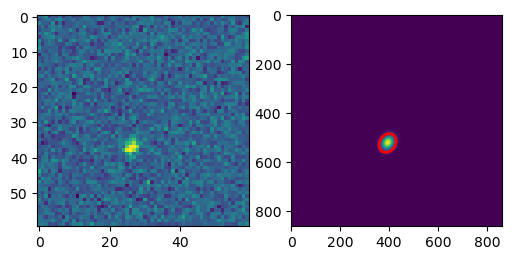

5 / 143 47


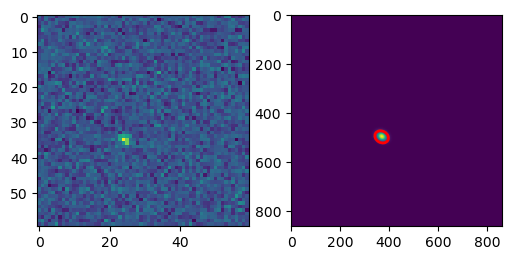

6 / 143 48


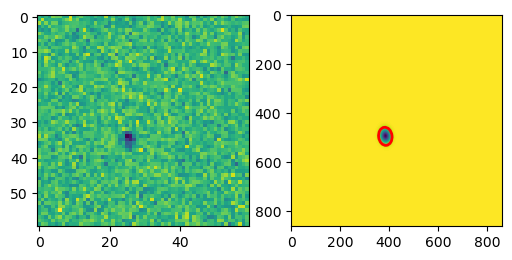

7 / 143 54


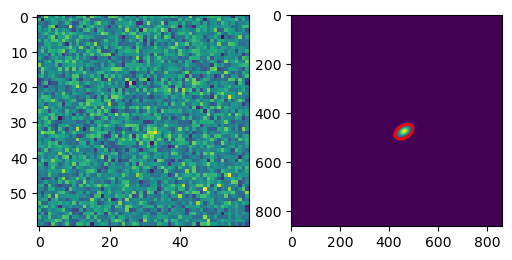

8 / 143 89


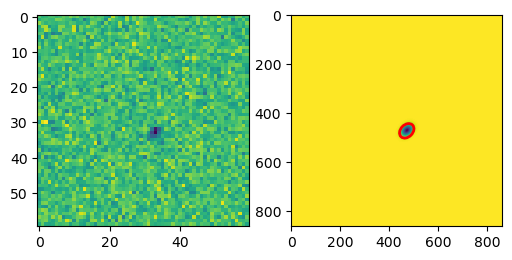

9 / 143 96


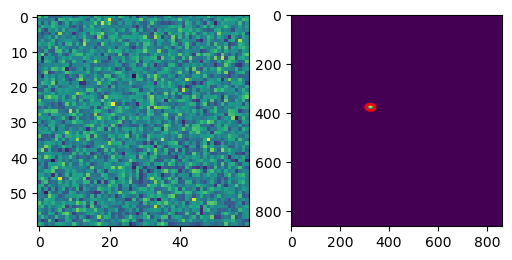

10 / 143 117


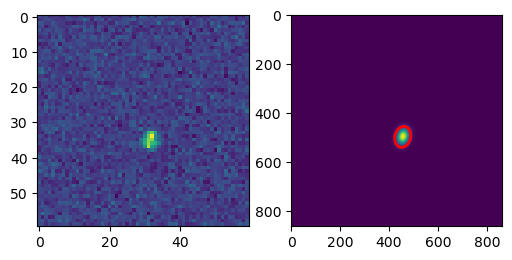

11 / 143 122


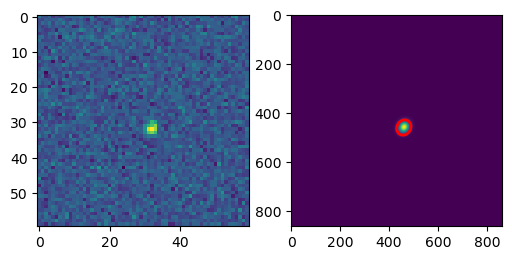

12 / 143 134


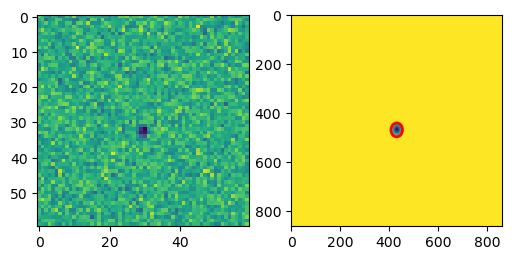

13 / 143 137


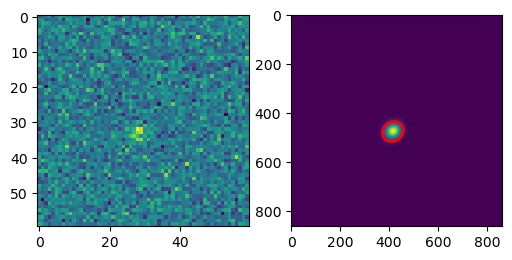

14 / 143 141


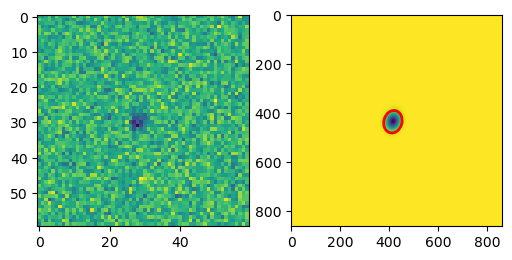

15 / 143 148


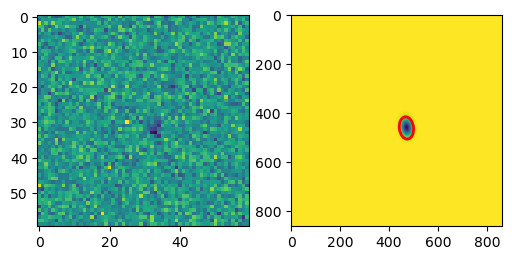

16 / 143 152


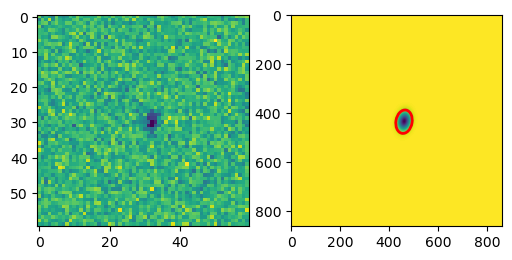

17 / 143 160


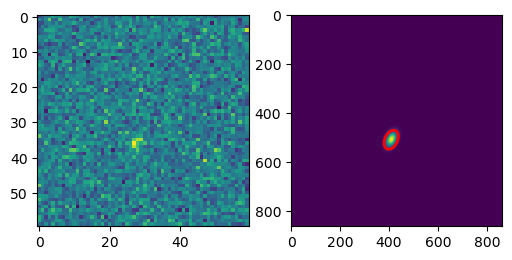

18 / 143 169


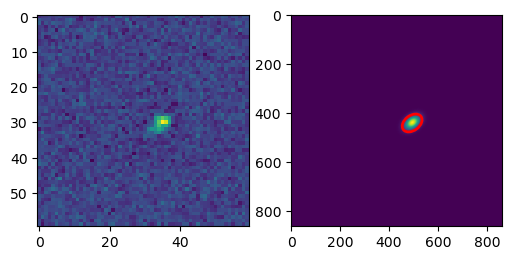

19 / 143 177


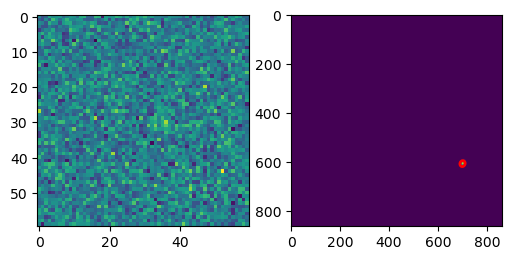

20 / 143 201


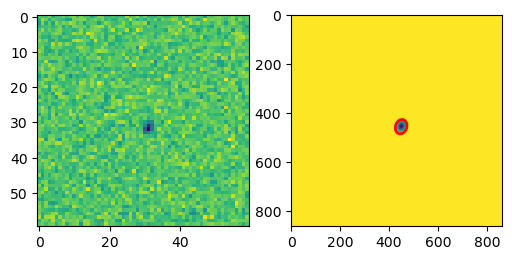

21 / 143 215


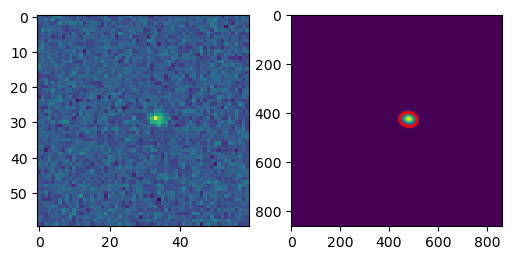

22 / 143 218


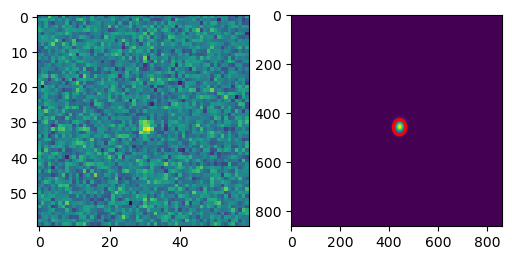

23 / 143 221


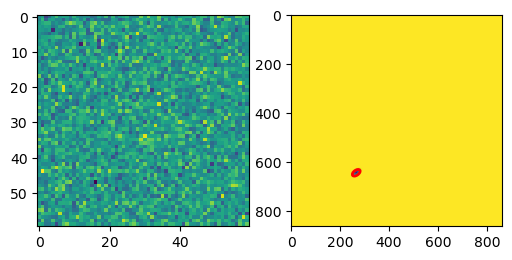

24 / 143 230


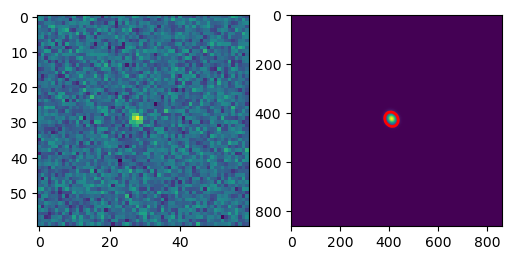

25 / 143 233


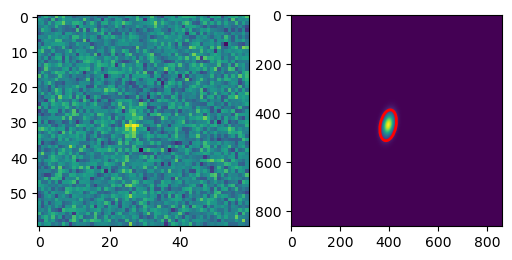

26 / 143 240


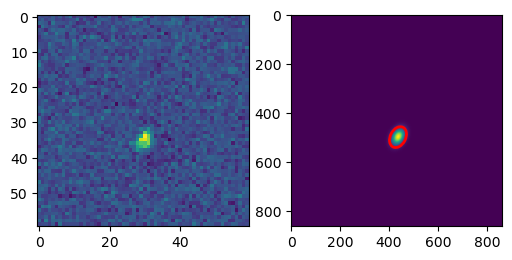

27 / 143 248


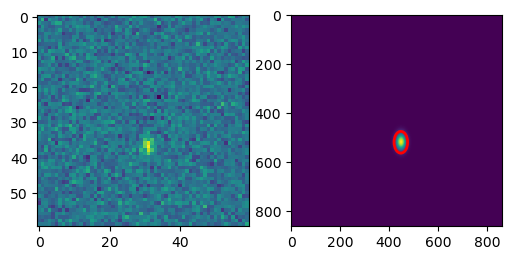

28 / 143 255


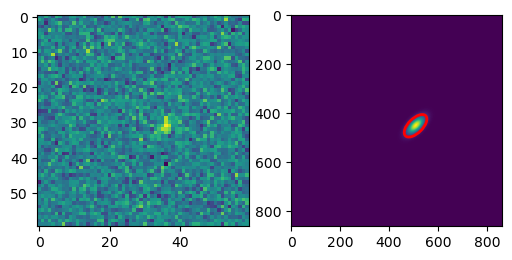

29 / 143 269


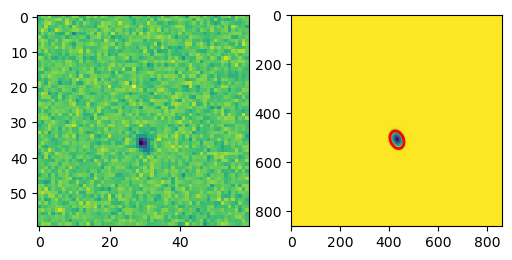

30 / 143 271


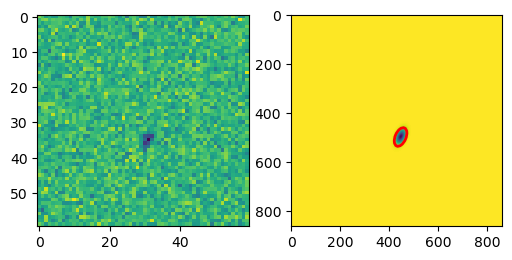

31 / 143 272


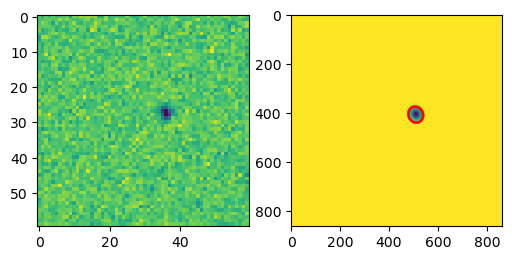

32 / 143 273


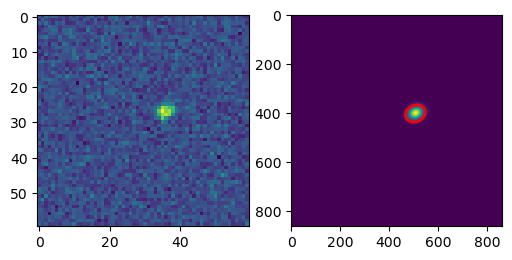

33 / 143 274


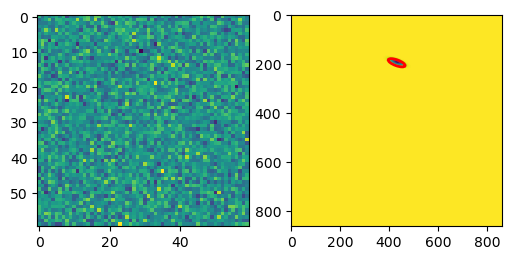

34 / 143 281


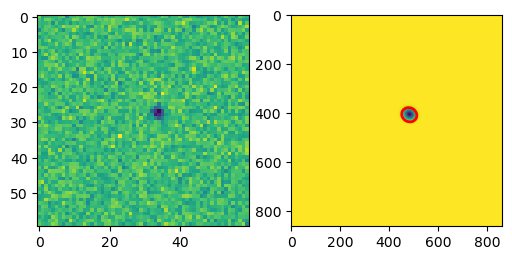

35 / 143 282


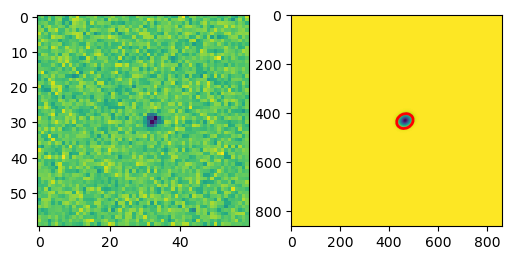

36 / 143 284


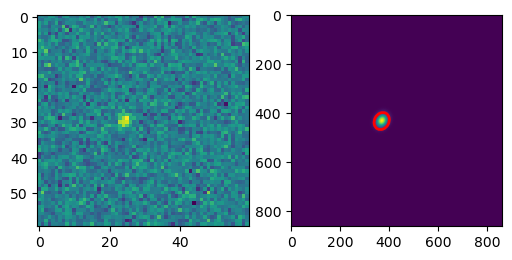

37 / 143 295


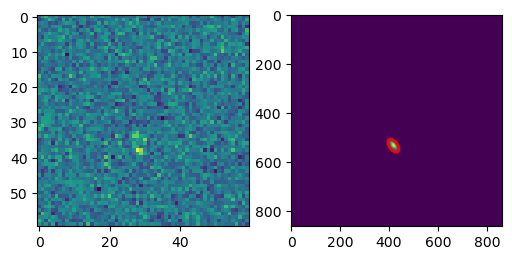

38 / 143 301


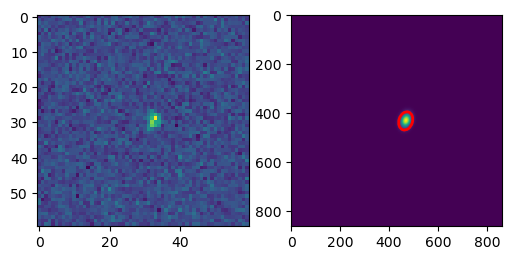

39 / 143 308


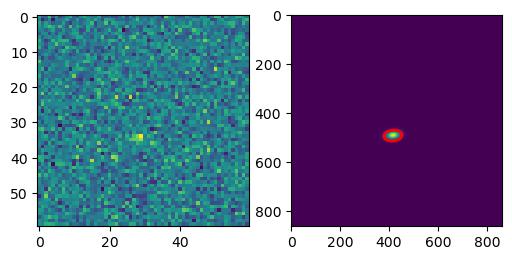

40 / 143 311


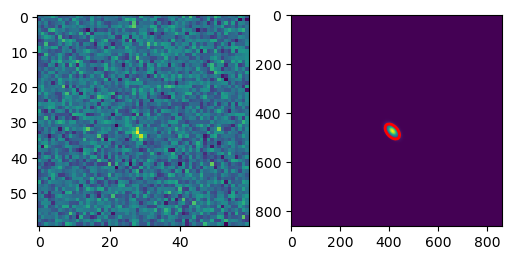

41 / 143 320


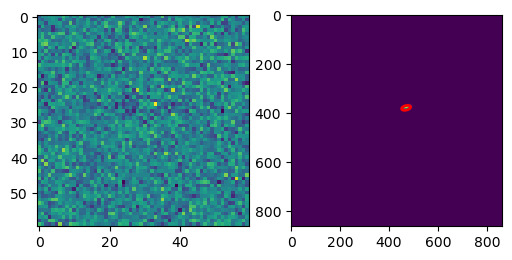

42 / 143 326


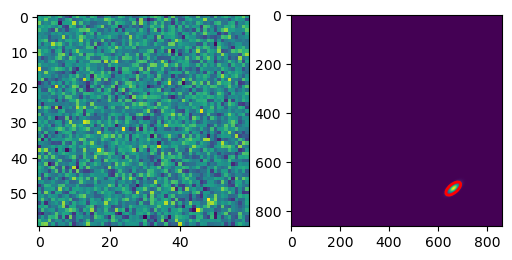

43 / 143 329


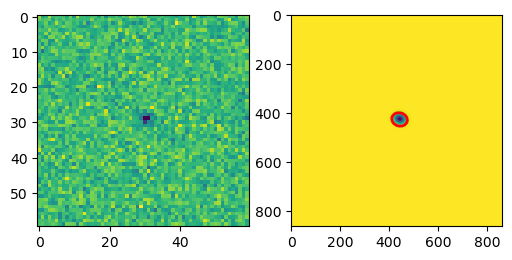

44 / 143 330


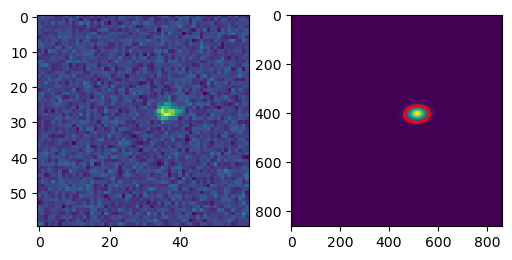

45 / 143 345


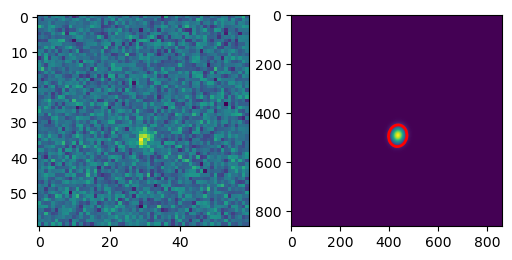

46 / 143 347


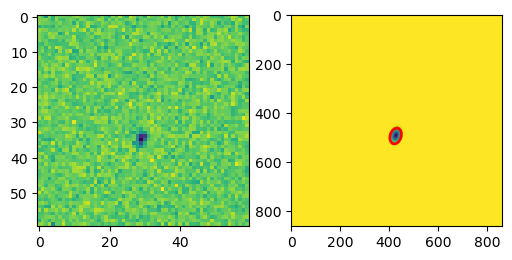

47 / 143 355


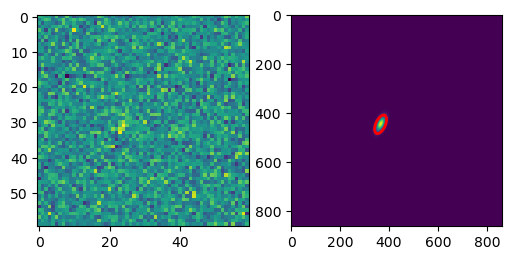

48 / 143 356


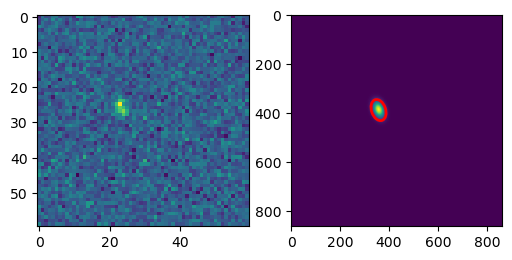

49 / 143 368


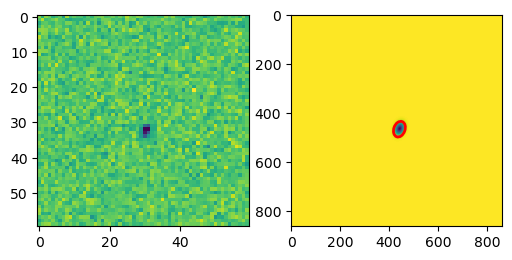

50 / 143 389


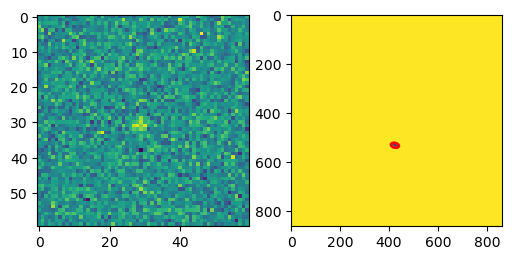

51 / 143 394


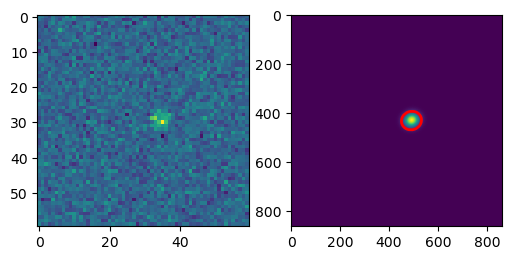

52 / 143 396


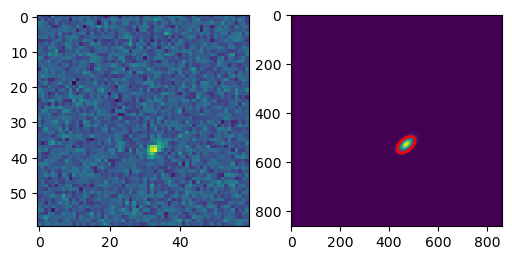

53 / 143 398


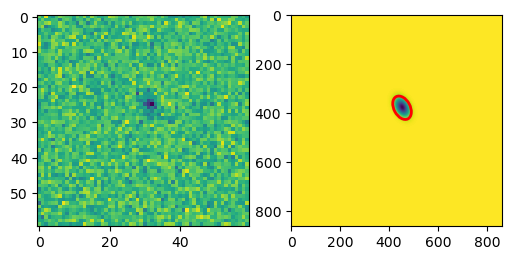

54 / 143 404


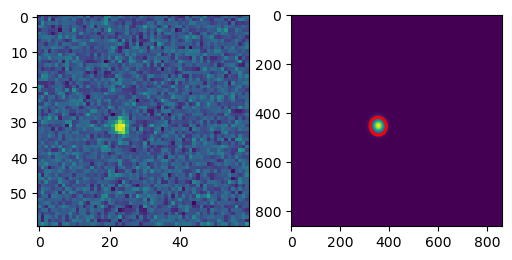

55 / 143 406


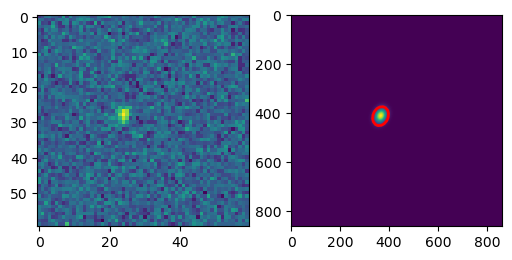

56 / 143 410


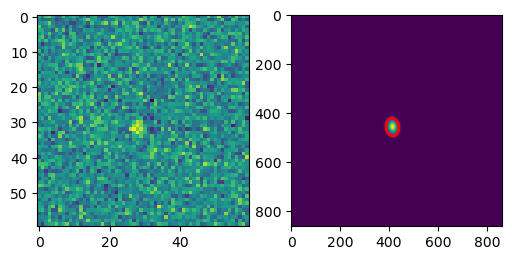

57 / 143 415


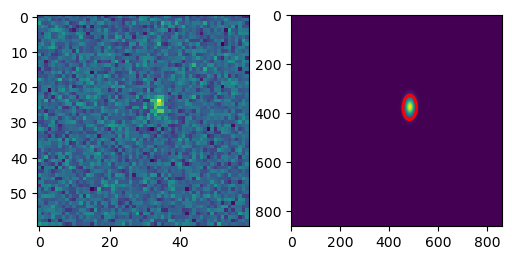

58 / 143 420


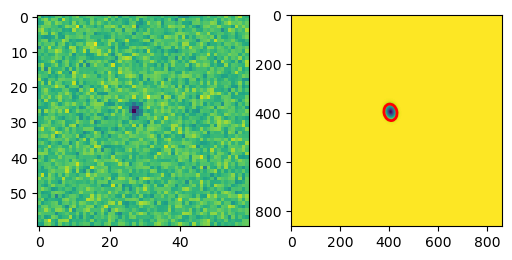

59 / 143 422


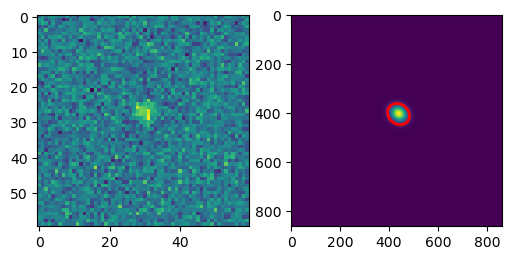

60 / 143 424


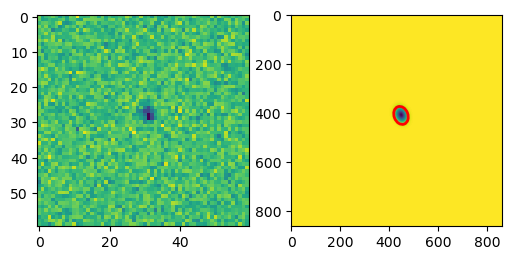

61 / 143 425


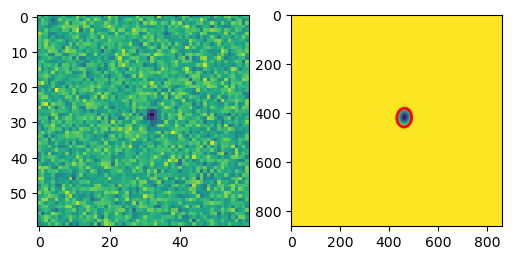

62 / 143 451


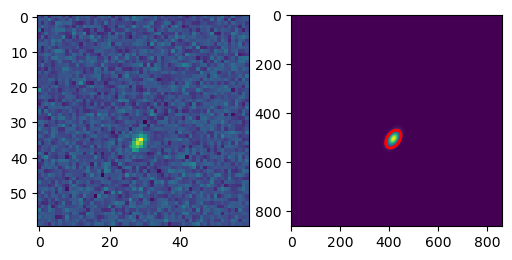

63 / 143 454


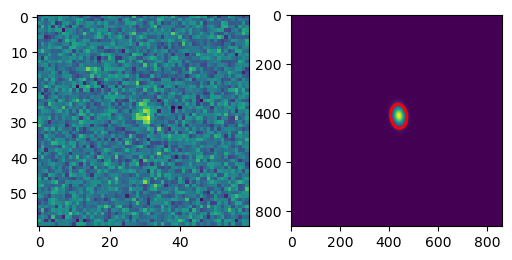

64 / 143 462


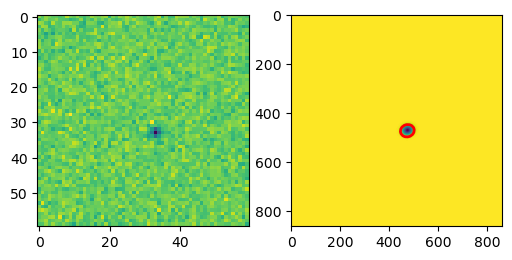

65 / 143 469


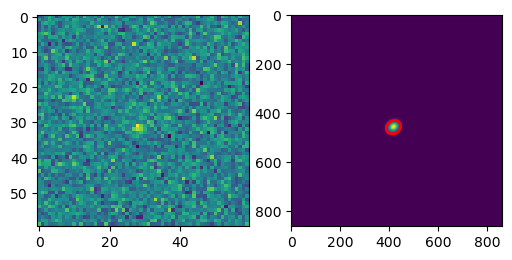

66 / 143 482


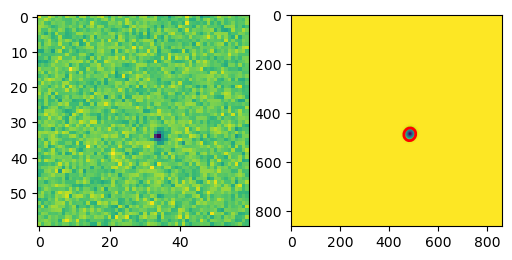

67 / 143 498


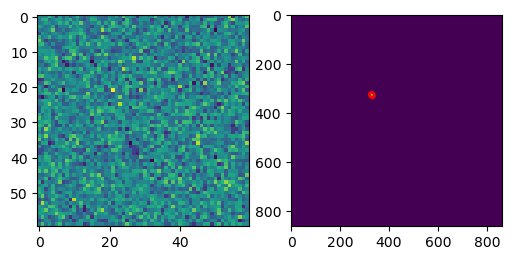

68 / 143 508


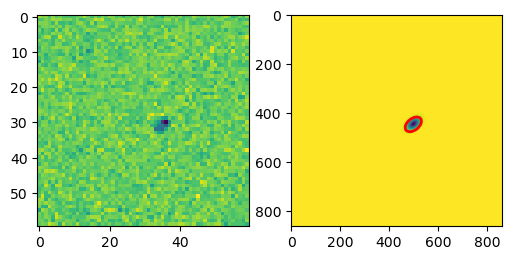

69 / 143 510


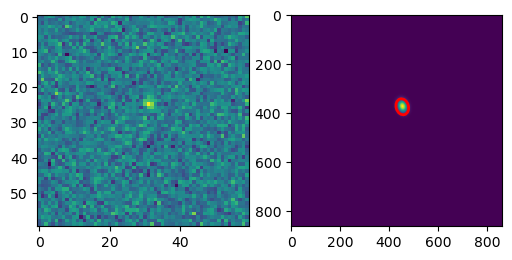

70 / 143 540


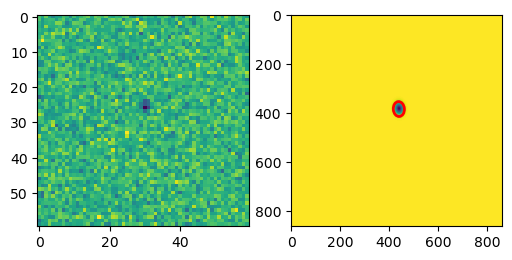

71 / 143 550


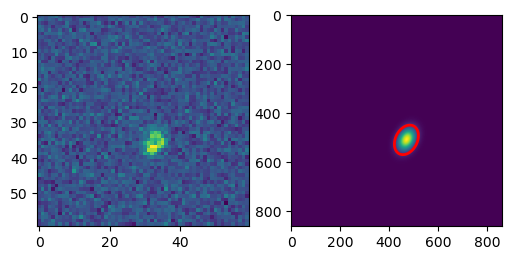

72 / 143 553


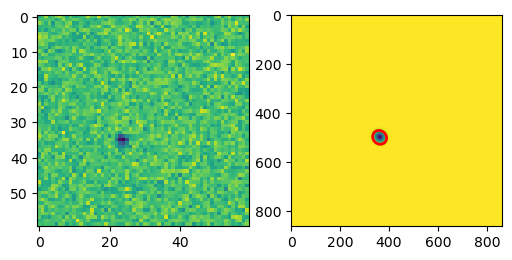

73 / 143 556


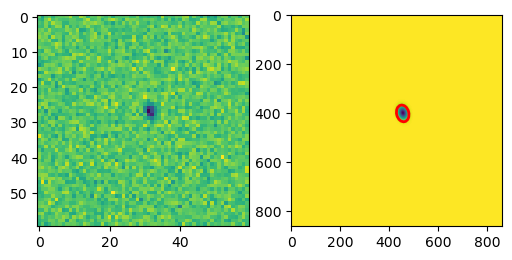

74 / 143 557


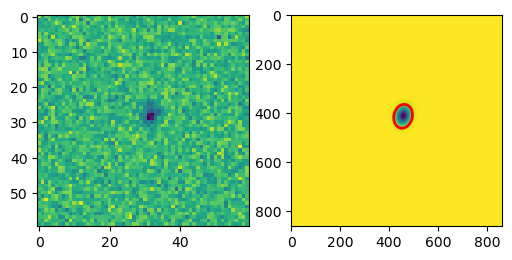

75 / 143 558


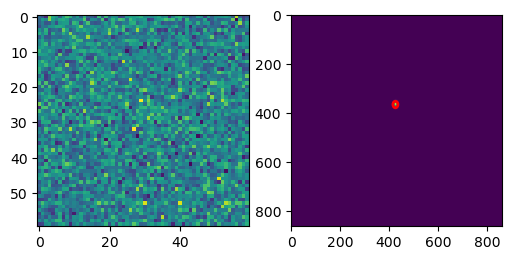

76 / 143 562


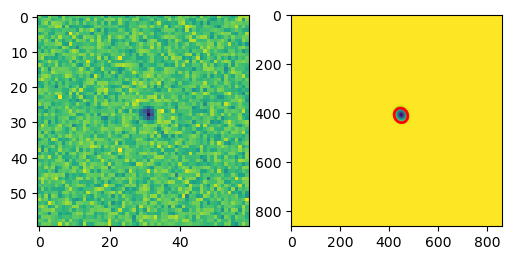

77 / 143 565


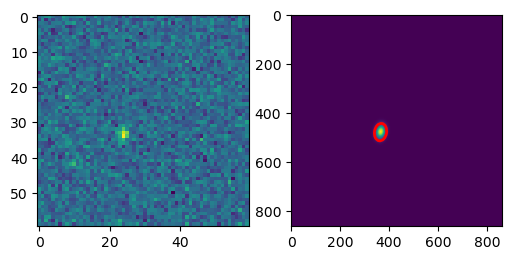

78 / 143 569


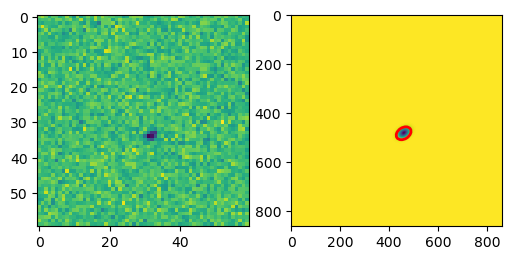

79 / 143 571


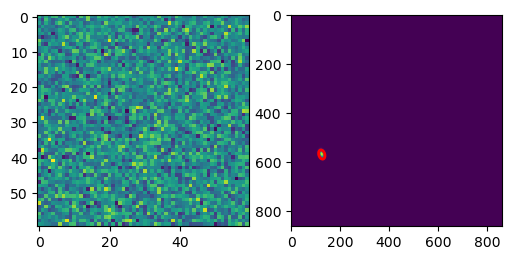

80 / 143 577


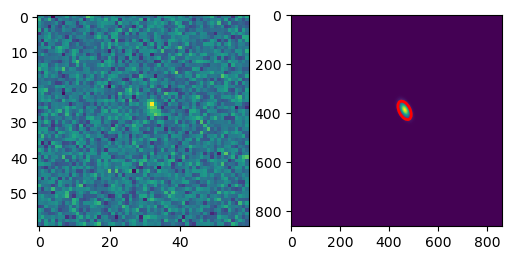

81 / 143 578


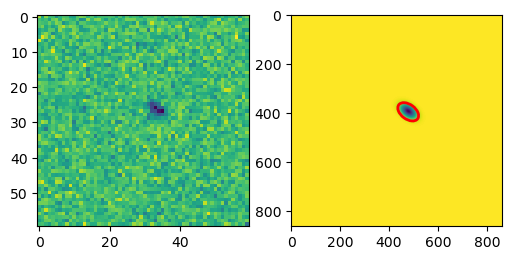

82 / 143 580


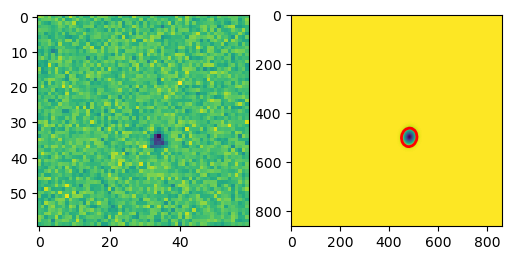

83 / 143 583


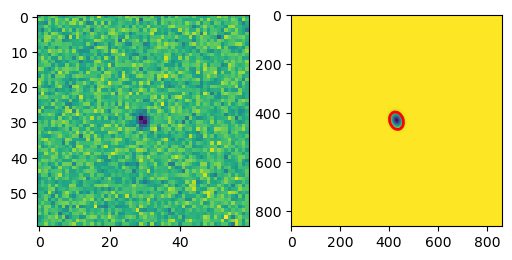

84 / 143 585


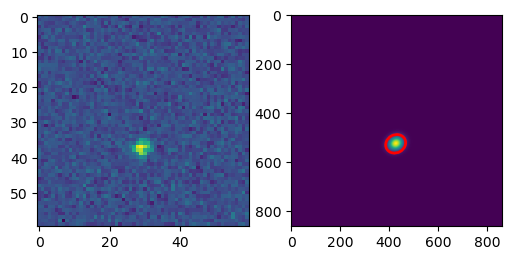

85 / 143 586


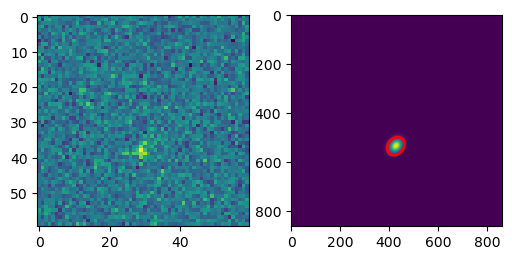

86 / 143 589


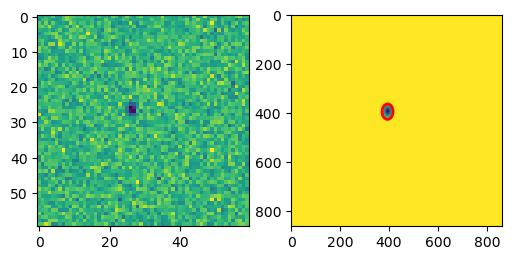

87 / 143 590


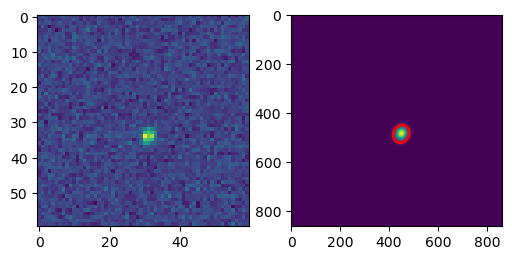

88 / 143 596


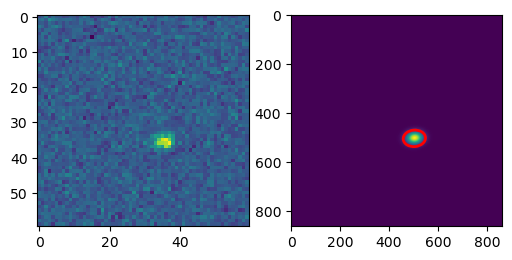

89 / 143 598


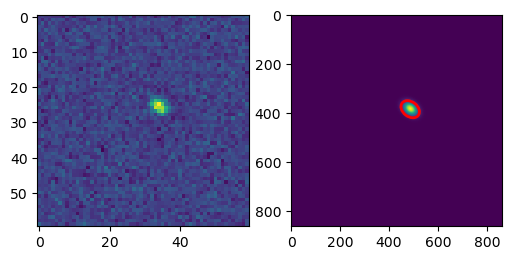

90 / 143 600


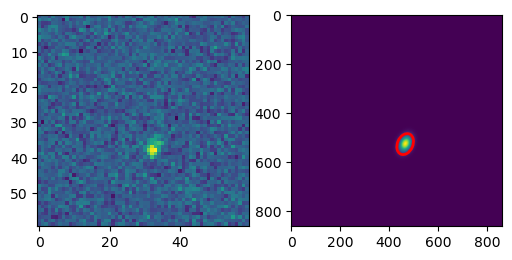

91 / 143 609


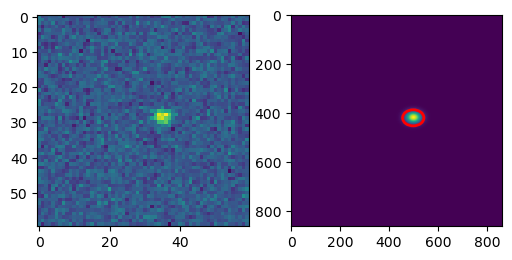

92 / 143 620


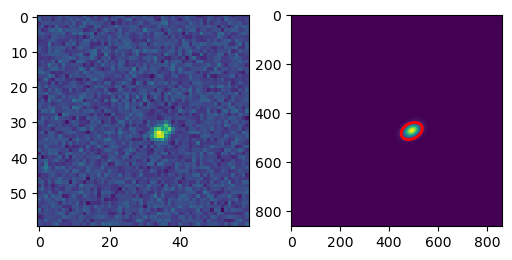

93 / 143 642


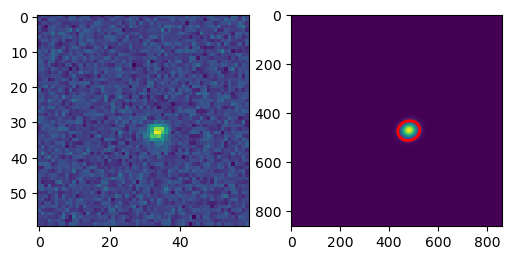

94 / 143 657


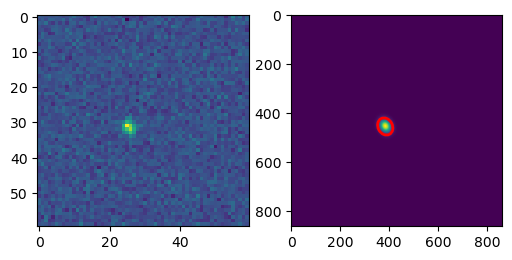

95 / 143 663


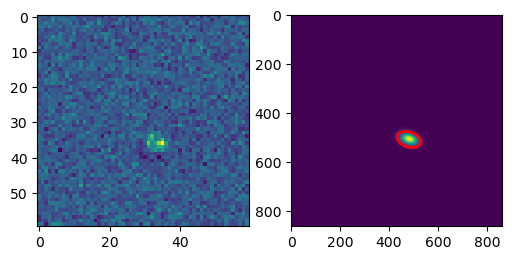

96 / 143 689


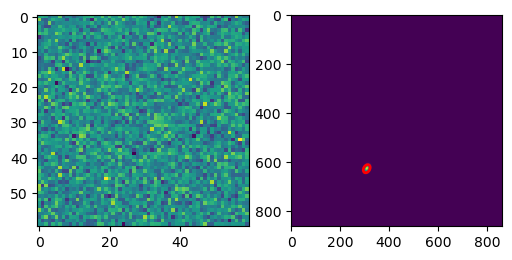

97 / 143 700


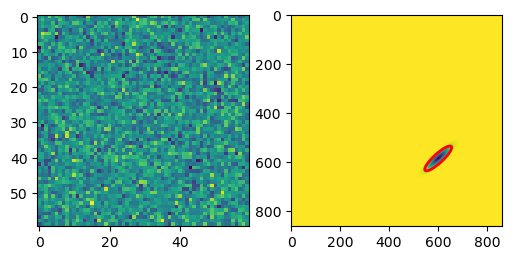

98 / 143 704


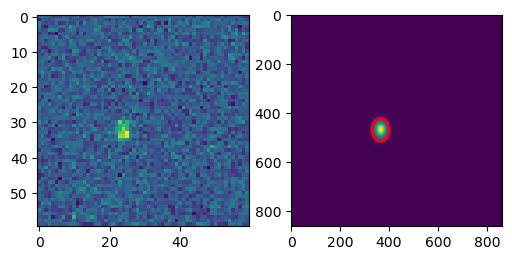

99 / 143 719


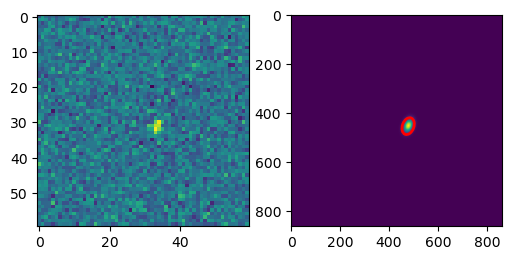

100 / 143 733


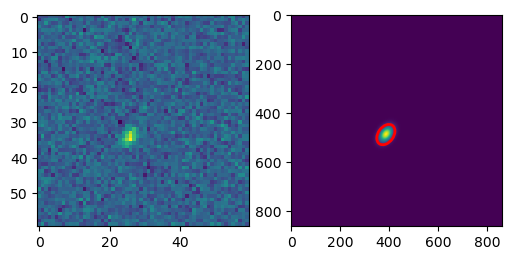

101 / 143 741


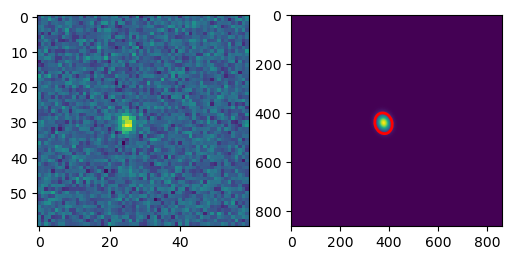

102 / 143 744


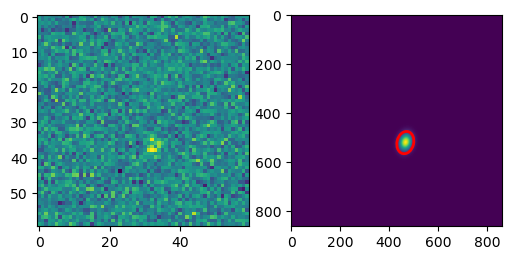

103 / 143 759


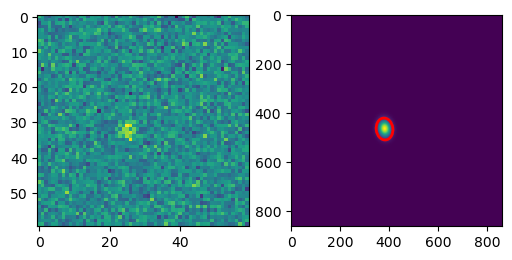

104 / 143 765


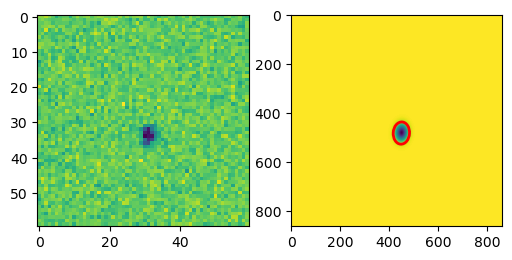

105 / 143 777


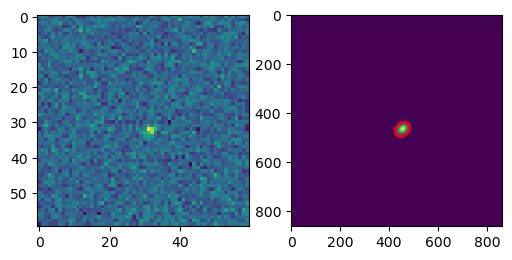

106 / 143 791


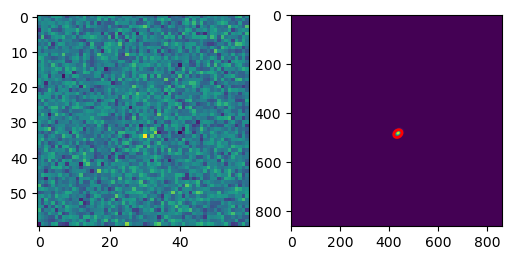

107 / 143 798


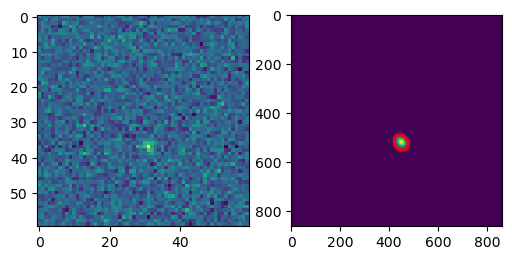

108 / 143 817


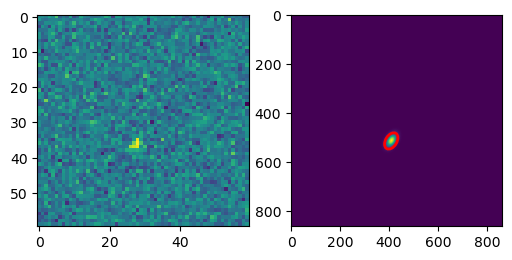

109 / 143 829


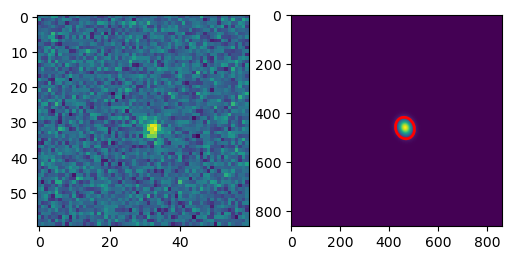

110 / 143 832


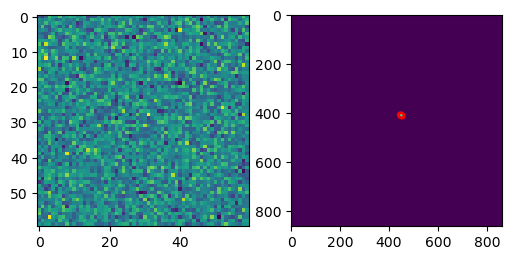

111 / 143 856


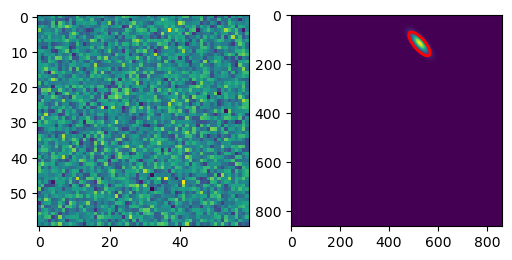

112 / 143 878


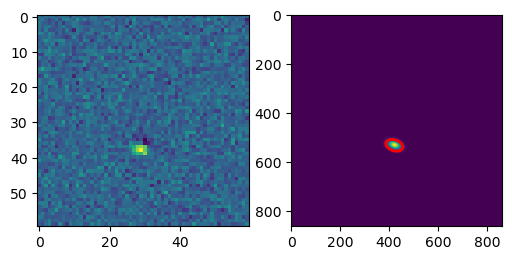

113 / 143 880


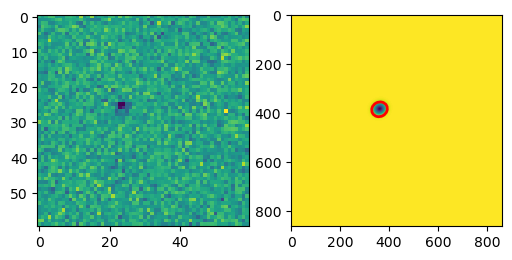

114 / 143 900


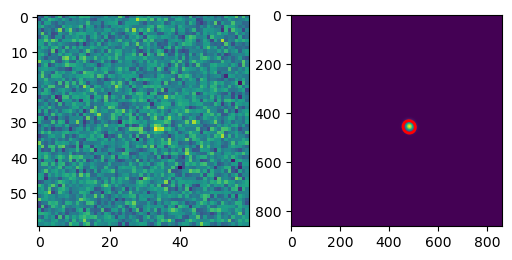

115 / 143 903


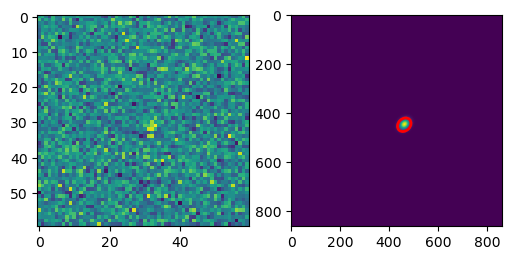

116 / 143 906


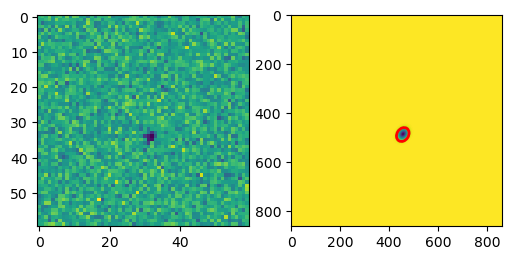

117 / 143 921


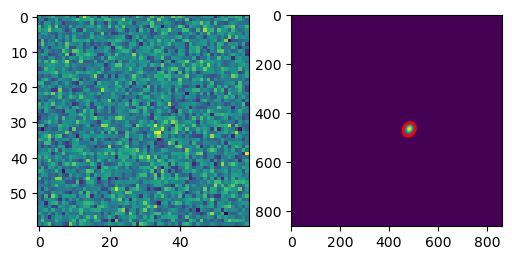

118 / 143 923


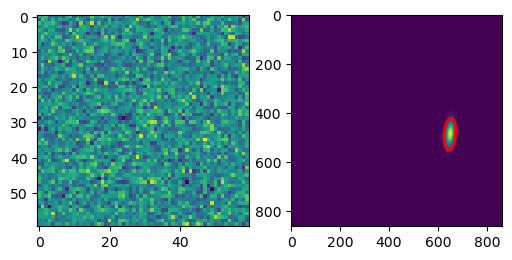

119 / 143 928


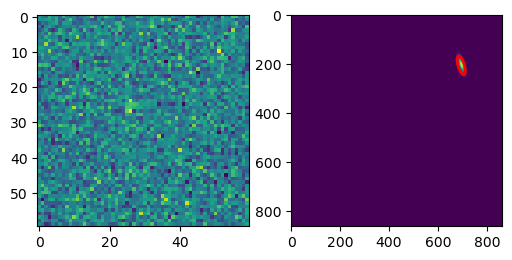

120 / 143 929


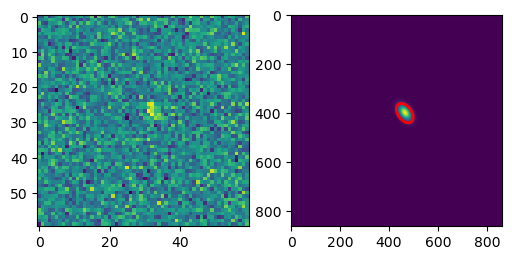

121 / 143 936


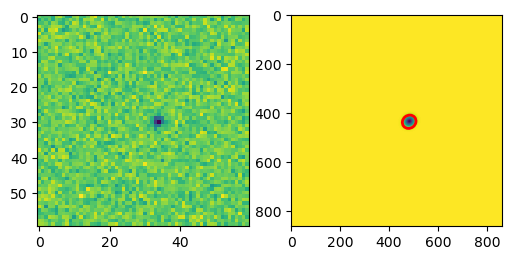

122 / 143 937


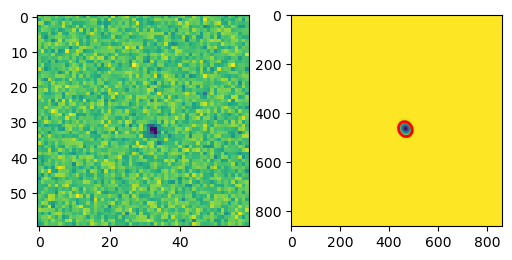

123 / 143 943


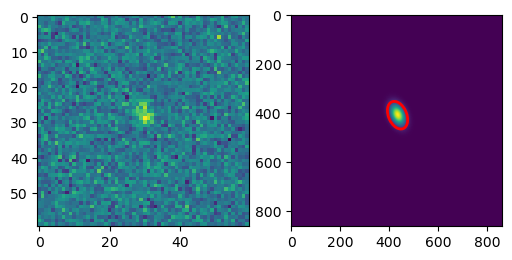

124 / 143 944


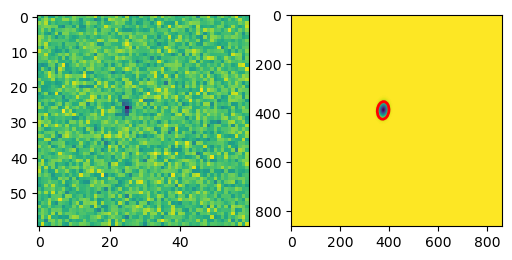

125 / 143 947


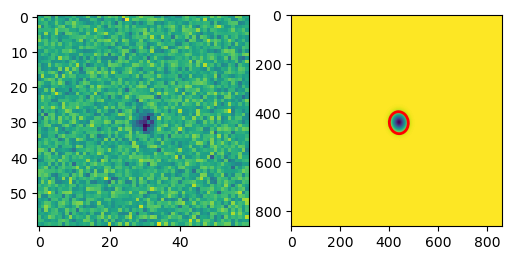

126 / 143 951


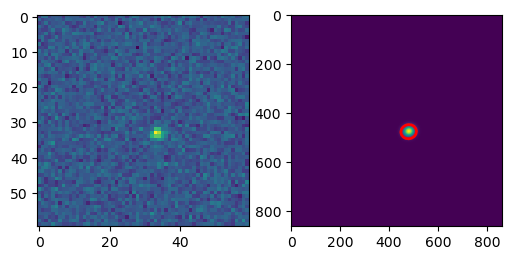

127 / 143 957


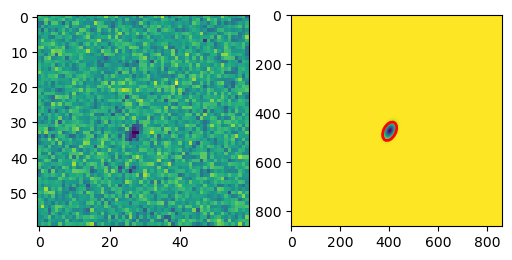

128 / 143 962


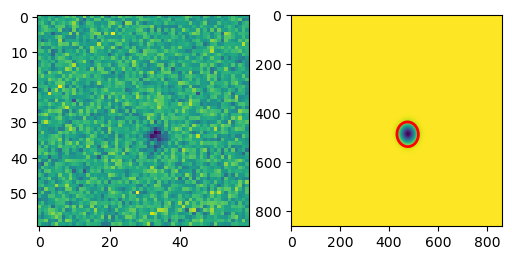

129 / 143 964


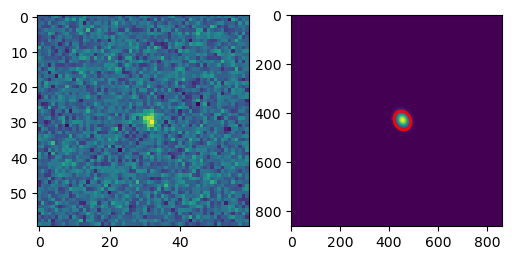

130 / 143 966


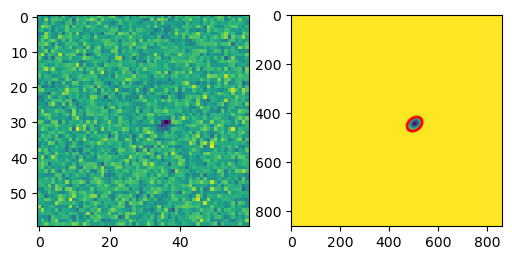

131 / 143 970


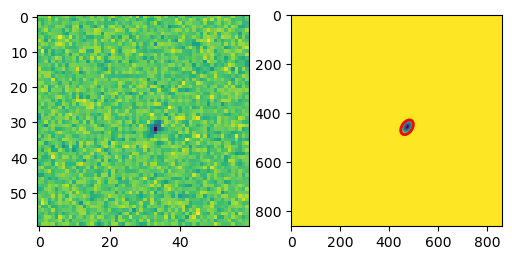

132 / 143 975


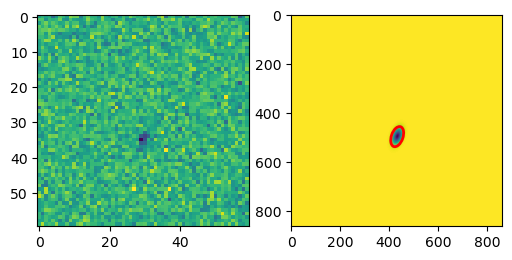

133 / 143 976


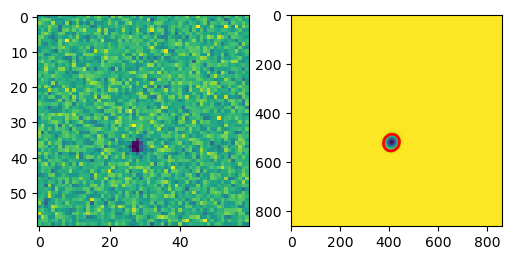

134 / 143 979


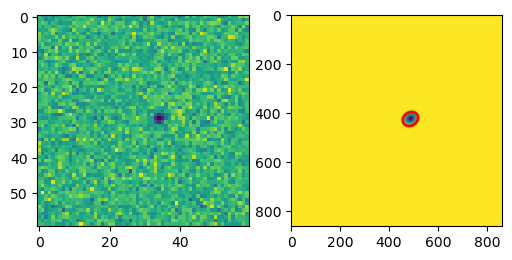

135 / 143 982


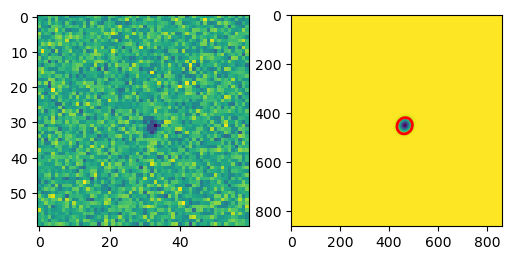

136 / 143 990


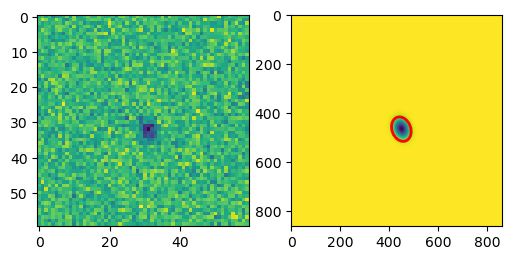

137 / 143 998


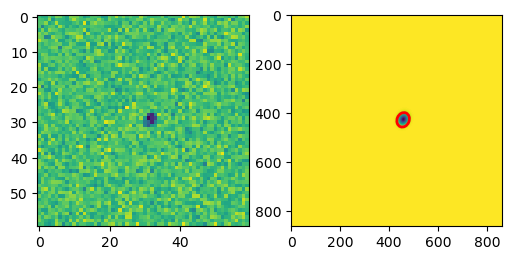

138 / 143 1005


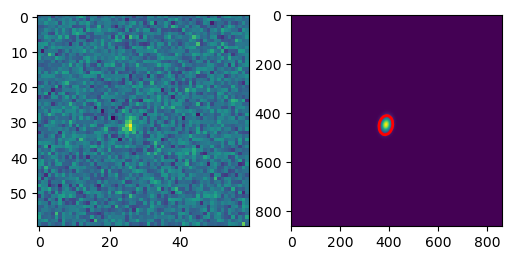

139 / 143 1010


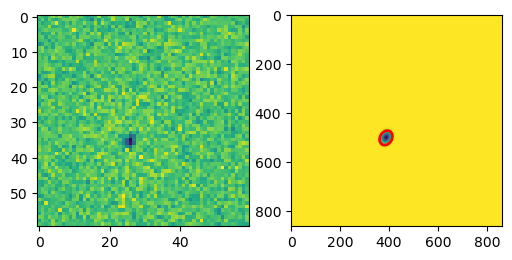

140 / 143 1018


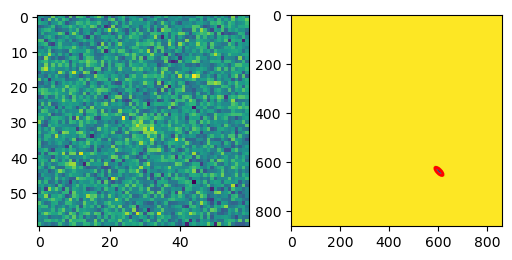

141 / 143 1030


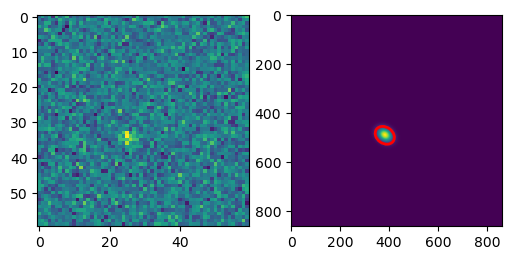

142 / 143 1039


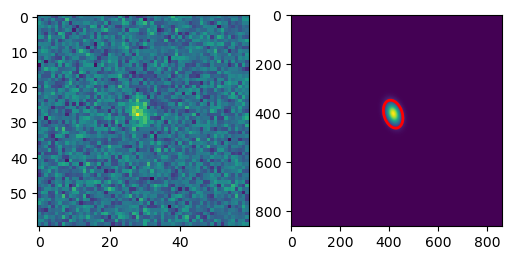

In [32]:
if exp == 20211208:
    skip_cells = [99,100,276,407,424,452, 472,498] 
elif exp == 20211207:
    skip_cells = [33, 52, 145, 302, 340, 406, 414, 515]
elif exp == 20211129:
    skip_cells = [45, 80, 188, 192, 401, 408, 422, 525, 533, 558, 561, 614, 682] 
elif exp == 20221213:
    skip_cells = [55, 180, 232, 294, 339, 365, 563, 570, 665, 680]
elif exp == 20221214:
    skip_cells = [40, 190, 332, 957]
elif exp == 20230105:
    skip_cells = [15, 96, 177, 221, 274, 320, 326, 389, 498, 558, 571, 689, 700, 791, 832, 856, 923, 928, 1018]
    
print (skip_cells)

ell_path = rootF + '/MEA/exp' + str(exp) + '/contrast analysis/ellipses_data_with_weights_2sigma_' + str(exp) 

if os.path.isfile(ell_path + '.pkl'):
    # Ellipse points were already calculated, so we load them
    print ('Loading ellipse points.')
    ellipse_data = load_obj(ell_path + '.pkl')
else:
    # We have to calculate ellipse points
    print ('Collecting ellipse points...')
    ellipse_data = {}

    for index in range(len(cells_clustering)):
        cell_nb = cells_clustering[index]
        print (index, '/', len(cells_clustering), cell_nb)
        if cell_nb in selected_cells and cell_nb not in skip_cells:
            if exp in [20221213, 20221214, 20230105]:
                cell_nb = str(cell_nb)

            ellipse_data[cell_nb] = {}

            ### Spatial STA
            spatial = cell_data[cell_nb]['spatial_sta']

            if which_STA[index] == 'start':
                spatial = cell_data[cell_nb]["spatial_sta"]
            elif which_STA[index] == 'end':
                spatial = cell_data[cell_nb]["spatial_sta2"]

            # Rescaling and translating the weights to the image size
            weights = np.zeros((img_size, img_size))
            resized_fitted_sta = resize(spatial, (check_size_pix, check_size_pix))
            weights[check_to_img_translation:-check_to_img_translation, \
                    check_to_img_translation:-check_to_img_translation] = resized_fitted_sta

            # Gaussian fit
            x_fit, y_fit, fitted_spatial_sta , parameters = fit_gaussian(weights)

            # Get ellipse parameters
            factor_sigma = 2
            x0, y0, width, height, angle = get_ellipse_parameters(parameters, factor=factor_sigma)

            ### Get points contained in the ellipse
            ellipse = pcs.Ellipse((x0,y0), width, height, angle=angle, fill=False, color='r',lw=2)

            # calculate the x and y points possibly within the ellipse
            y_int = np.arange(0, 864)
            x_int = np.arange(0, 864)

            # create a list of possible coordinates
            g = np.meshgrid(x_int, y_int)
            coords = list(zip(*(c.flat for c in g)))

            # create the list of valid coordinates (from untransformed)
            ellipsepoints = np.vstack([p for p in coords if ellipse.contains_point(p, radius=0)])

            fig = plt.figure(figsize=(6,3))

            ax = fig.add_subplot(121)
            ax.imshow(spatial, origin = 'upper')
            ax.add_artist(ellipse)

            ax = fig.add_subplot(122)
            ax.imshow(fitted_spatial_sta, origin = 'upper')
            ellipse = pcs.Ellipse((x0,y0), width, height, angle=angle, fill=False, color='r',lw=2)
            ax.add_artist(ellipse)

            plt.show()

            ### Save ellipse points and ellipse parameters in a dict
            ellipse_data[cell_nb]['ellipse_points'] = ellipsepoints
            ellipse_data[cell_nb]['ellipse_parameters'] = x0, y0, width, height, angle
            ellipse_data[cell_nb]['weights'] = weights

In [33]:
### Save ellipses
save_path = rootF + '/contrast analysis/ellipses_data_with_weights_2sigma_' + str(exp)    

save_obj(ellipse_data, save_path)